In [1]:
import sklearn
from sklearn import datasets
import pandas
import seaborn
import matplotlib.pyplot as plt


Bad key “backend in file /Users/guillermo/.matplotlib/matplotlibrc, line 1 ('“backend: TkAgg”')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


#### Mask the dataset creation for educational purposes (viewer: do not open)

In [2]:
data, labels = datasets.make_classification(n_samples=1000,                                                                    n_features=5, n_classes=2, n_informative=3, n_redundant=0, n_repeated=0, random_state=7)

In [3]:
df_data = pandas.DataFrame(data, columns=['comms', 'remote access', 'weather', 'external partners', 'physical access'])

df_labels = pandas.DataFrame(labels, columns=['go/no-go criterion']) # go=0, no-go=1
dataset = pandas.concat([df_data, df_labels], axis=1)

One of the most important concepts we'll see below is the notion of dataset evolution. One of the most fundamental assumptions in applying machine learning within the operational environment is that the data used to train the model and the data we'll expose the model to in operations come from the same probability distribution. In other words, we assume the battlefield will look exactly as we trained to...

We've simulated adding more examples and notice our model improved its accuracy despite having more decision complexity. The point of that was to show that more data can help you model's performance. What we'll see below is a change in distributions compared to the previous dataset. The point of this is to show that your real-world events distributions can change and so you must know when your model is becoming obsolete. In the field of ML this concern is called "concept drift." [1](https://www-ai.cs.tu-dortmund.de/LEHRE/FACHPROJEKT/SS12/paper/concept-drift/tsymbal2004.pdf) | [2](https://machinelearningmastery.com/gentle-introduction-concept-drift-machine-learning/)

# Empirical Cumulative Distribution

[ECDF reference](https://towardsdatascience.com/what-why-and-how-to-read-empirical-cdf-123e2b922480) |
[ECDF reference](https://machinelearningmastery.com/empirical-distribution-function-in-python/) |
[Seaborn ecdfplot() reference](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html) 

Text(0.5, 1.0, 'Feature Analysis | Empirical Cumulative Distribution')

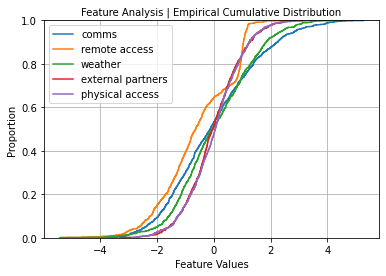

In [4]:
for feature in [*df_data]:  # unpack the column names in df_data via [*]
    axes = seaborn.ecdfplot(df_data[feature])
    axes.grid(True)

# set the plot's label
axes.set_xlabel('Feature Values', fontsize=10)
# set plot's legend labels
axes.legend([*df_data], fontsize=10)
# set plot's title
axes.set_title('Feature Analysis | Empirical Cumulative Distribution', fontsize=10)

# Kernel Density Estimation

`Change the parameter bw_adjust to see its effect on the distribution` </br>
[Seaborn kdeplot() reference](https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

Text(0.5, 1.0, 'Feature Analysis | Kernel Density Estimation')

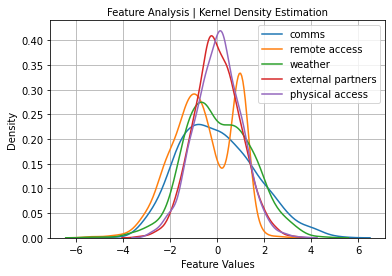

In [5]:
for feature in [*df_data]:  # unpack the column names in df_data via [*]
    axes = seaborn.kdeplot(df_data[feature], bw_adjust=1.0)  # bw_adjust is defaulted to 1.0
    axes.grid(True)

# set the plot's label
axes.set_xlabel('Feature Values', fontsize=10)
# set plot's legend labels
axes.legend([*df_data], fontsize=10)
# set plot's title
axes.set_title('Feature Analysis | Kernel Density Estimation', fontsize=10)

# Kernel Density Estimation Pair Plot

Which feature would you consider to be noise? Which features would you consider informative?

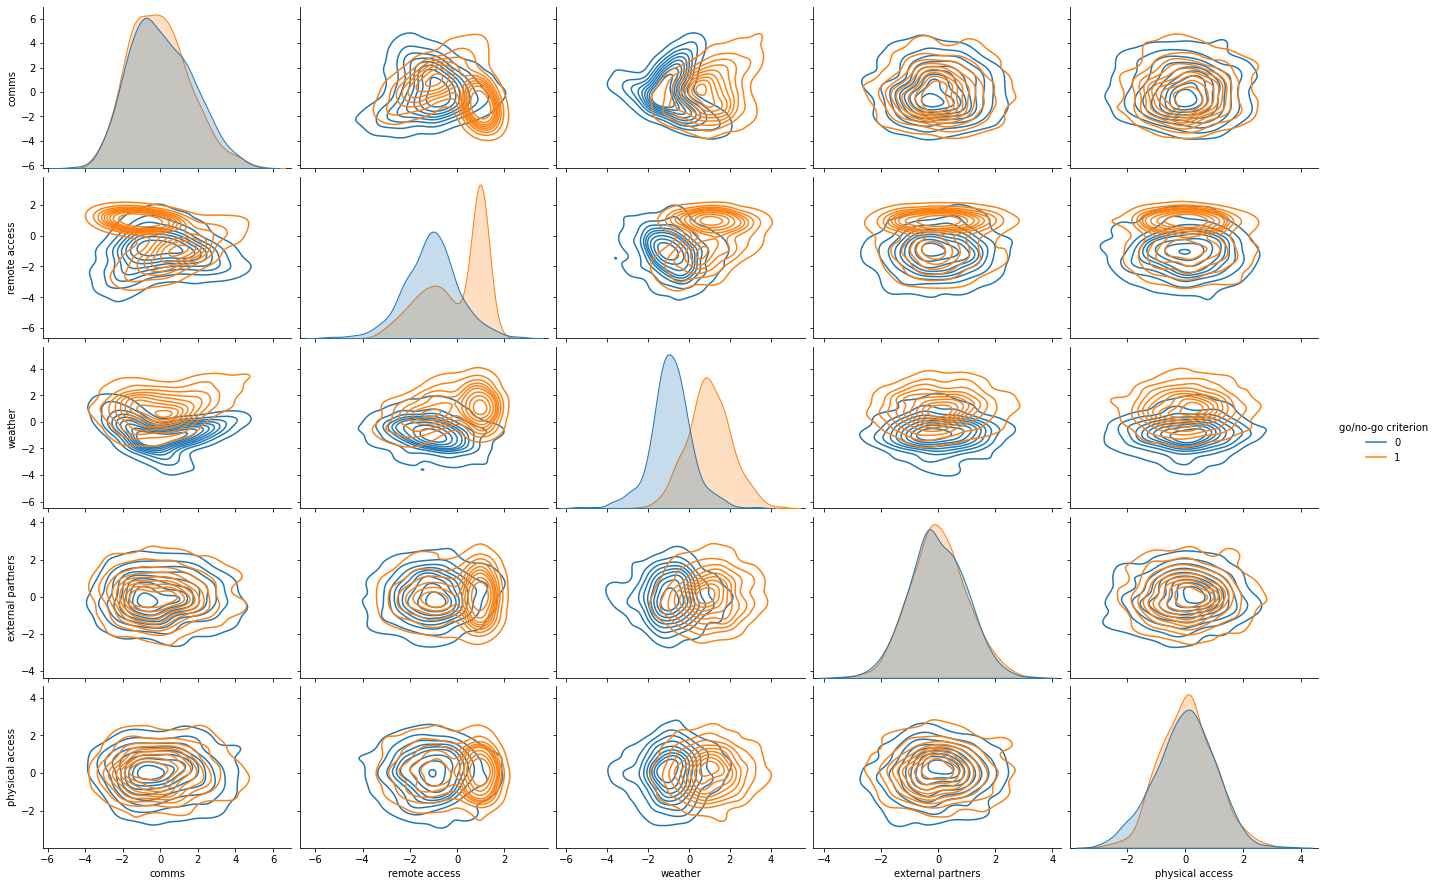

In [6]:
pairgrid = seaborn.pairplot(dataset, kind='kde', hue='go/no-go criterion', aspect=1.5)

# Viewing the Kernel Density Estimation (KDE) of all the observations


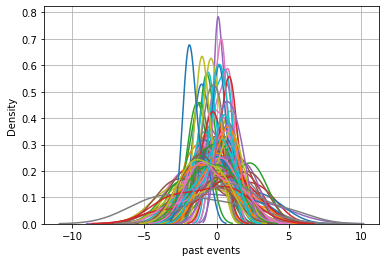

In [7]:
for data_row in range(0, 100): # range is done based on the amount of observations (i.e. rows) we have in our dataset
    axes = seaborn.kdeplot(df_data.iloc[data_row], bw_adjust=1.0)
    axes.set_xlabel('past events')
    axes.grid(True)

Play around with the bandwidth to smooth or un-smooth the distributions :) 

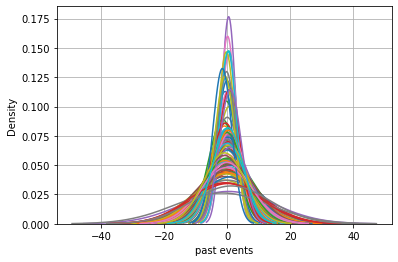

In [8]:
for data_row in range(0, 100): # range is done based on the amount of observations (i.e. rows) we have in our dataset
    axes = seaborn.kdeplot(df_data.iloc[data_row], bw_adjust=7.0)
    axes.set_xlabel('past events')
    axes.grid(True)

For funzies I few the ECD of the observations. This chart tell me nothing. Ha

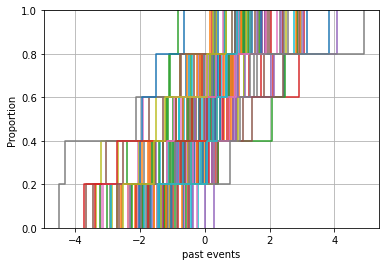

In [9]:
for sample in range(0, 100):  # range is done based on the amount of observations (i.e. rows) we have in our dataset
    axes = seaborn.ecdfplot(df_data.iloc[sample])
    axes.set_xlabel('past events')
    axes.grid(True)